<a href="https://colab.research.google.com/github/bcastiblancoo/Experimental-High-Energy-Physics---Subject/blob/main/Data_VS_MC_ttbar-semileptonic-selection/CODE_HW5_DataVsMC_TTbarSel_8TeV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 5-Comparison Data vs. MC: The ttbar-1lep selection** we already have made the selection for the actual data, so the following lines are the code used (and presented in HW4) for that purpose. And then, we will write the lines for MC events, where we do an analogous procedure to the first part, in order to finally compare the actual data and MC events in the same histograms **after all cuts have been applied**. That's why we need to include both parts in the same code.

In [ ]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion python2.7
!gdown https://drive.google.com/uc?id=1bWgcTAMG7IoyQASWwrrOQrGe4haUAo9t
!cd /; tar xzf /content/root_for_colab.tar.gz
!rm -rf root_for_colab.tar.gz
import sys
sys.path.append("/content/root/build/")
sys.path.append("/content/root/build/bin/")
sys.path.append("/content/root/build/include/")
sys.path.append("/content/root/build/lib/")
import ROOT
import math

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
python2.7 is already the newest version (2.7.17-1~18.04ubuntu1.6).
python2.7 set to manually installed.
The following additional packages will be installed:
  binutils-common binutils-x86-64-linux-gnu libap

Import the data we want to analyze, which is saved in a .root file and contain tracks and calorimeters clusters:

In [ ]:
F = ROOT.TFile.Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/Data_8TeV.root")

Now we define a tree to get the data out of the above imported file. The tree in this root file is called "mini". And then we will print the content of this tree:

In [ ]:
tree=F.Get("mini")
tree.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In Python is not necessay to activate the variables. So, we proceed to create the canvas:

In [ ]:
canvas=ROOT.TCanvas("Canvas","TTbarSel exercise",800,600)

Let's create the histograms for distributions of the main kinematic variables:

**Distribution Plots:** 



1.   For the leptons we will create and fill histograms for:
* Transverse momentum: $p_{T}$
* Track isolation: $\frac{p_{Tcone30}}{p_{T}}$ 
* Calorimeter isolation: $\frac{E_{Tcone20}}{p_{T}}$
* *Pseudorapidity*: $\eta$ 





In [ ]:
#Create histograms for leptons:
hist_lepton_pt=ROOT.TH1F("Leptons-pt","Leptons pT; pT(GeV); Events",50,0,1000)
hist_lepton_ptcone30=ROOT.TH1F("Leptons-ptcone30","Track Isolation; lep_ptcone30/lep_pt; Events",50,0,2) 
hist_lepton_etcone20=ROOT.TH1F("Leptons-etcone30","Caolirimeter Isolation; lep_etcone30/lep_pt; Events",50,0,2) 
hist_lepton_eta=ROOT.TH1F("Leptons-eta","Leptons eta; eta; Events",50,-4,4)

2.   For jets we will also create and fill histograms for:
* Number of jets
* Transverse momentum: $p_{T}$
* *Pseudorapidity*: $\eta$ 
* Jet Vertex Fraction (JVF)
* MV1 Output
* Number of b-jets

In [ ]:
#create histograms:
hist_njets=ROOT.TH1F("njets","Histogram of the number of jets; Number of jets; Events",15,0,15)
hist_jets_pt=ROOT.TH1F("jets_pt","Jets pT; pT(GeV); Events",50,0,1000)
hist_jets_eta=ROOT.TH1F("jets_eta","Jets eta; eta; Events",50,-4,4)
hist_jets_jvf=ROOT.TH1F("jets_jvf","Jets JVF; JVF; Events",50,-1,1)
hist_jets_mv1=ROOT.TH1F("jets_mv1","Jets MV1; MV1; Events",50,0,1)
hist_nbjets=ROOT.TH1F("nbjets","Histogram of the number of b-jets; Number of b-jets; Events",15,0,15)

3. For the Missing Transverse Energy (ME$_{T}$) which can be interpreted as neutrinos or other non-interacting particles.

In [ ]:
#Create the histogram
hist_met=ROOT.TH1F("met","Missing Transverse Energy MET; MET (GeV); Events",50,0,250)

4. For the transverse mass of W boson $m_{T}(W)$: 

In [ ]:
#Create the histogram just for now:
hist_mtw=ROOT.TH1F("mtw","Transverse mass of W boson; mTW (GeV); Events",50,0,250)

Create the histogram for the cutflow:

In [ ]:
cutflow=ROOT.TH1F("Cutflow","Cutflow; Cut; Events",10,0,10)

Proceed to make the cuts by making a loop over the cutflow:

In [ ]:
cut1=0;
cut2=0;
cut3=0;
cut4=0;
cut5=0;
cut6=0;
cut7=0;
cut8=0;


for event in tree:
  #First cut: Good vertex
  if not tree.hasGoodVertex:
    continue
  cut1+=1;
  cutflow.Fill(1);

  #Second cut: Trigger
  if not tree.trigE and not tree.trigM:
    continue
  cut2+=1;
  cutflow.Fill(2); 

  # Preselection of good leptons and loop over leptons:
  n_mu=0;
  n_el=0;
  n_lep=0;

  for i in range(0,tree.lep_n):
    if tree.lep_pt[i]<25000.:
      continue
    if tree.lep_ptcone30[i]/tree.lep_pt[i]>0.15:
      continue
    if tree.lep_type[i]==13 and abs(tree.lep_eta[i])<2.5:
      n_mu+=1;
    if tree.lep_type[i]==11 and abs(tree.lep_eta[i])<2.47 and (abs(tree.lep_eta[i])<1.37 or abs(tree.lep_eta[i])>1.52):
      n_el+=1;
    n_lep+=1;
  
  #Select events with only 1 good lepton and fill the cutflow histogram

  #Third cut (one good lepton)
  if n_lep!=1:
    continue
  cutflow.Fill(3);
  cut3+=1;

  #Fill lepton histograms:
  for j in range(0,tree.lep_n):
    hist_lepton_pt.Fill(tree.lep_pt[j]/1000,1);
    hist_lepton_ptcone30.Fill(tree.lep_ptcone30[j]/tree.lep_pt[j],1);
    hist_lepton_etcone20.Fill(tree.lep_etcone20[j]/tree.lep_pt[j],1);
    hist_lepton_eta.Fill(tree.lep_eta[j],1);

  n_jets=0;
  n_bjets=0;

  #Fourth cut: At least 4 jets
  if tree.jet_n<4:
    continue
  cutflow.Fill(4);
  cut4+=1;

  for k in range(0,tree.jet_n):
    if tree.jet_pt[k]<25000.:
      continue 
    #To complete: apply jet cuts to find the good jets
    if abs(tree.jet_eta[k])>2.5:
      continue
    if tree.jet_pt[k]<50000. and abs(tree.jet_eta[k])<2.4:
      if tree.jet_jvf[k]<0.5:
        continue
    n_jets+=1;
    #And at least two b-jets:
    if tree.jet_MV1[k]<0.7892:
      continue
    n_bjets+=1;

  #Fifth cut: At least 4 good jets
  if n_jets<4:
    continue
  cutflow.Fill(5);
  cut5+=1;
  
  #Fill jets histograms:
  hist_njets.Fill(tree.jet_n,1);
  for m in range(0,tree.jet_n):
    hist_jets_pt.Fill(tree.jet_pt[m]/1000,1);
    hist_jets_eta.Fill(tree.jet_eta[m],1);
    hist_jets_jvf.Fill(tree.jet_jvf[m],1);
    hist_jets_mv1.Fill(tree.jet_MV1[m],1);
  

  #Sixth cut: at least one b-jet

  if n_bjets<2:
    continue
  cutflow.Fill(6);
  cut6+=1;
  
  #Fill number the b-jets:
  hist_nbjets.Fill(n_bjets,1)

  #Seventh cut: MET > 30 GeV
  if tree.met_et<30000.:
    continue
  cutflow.Fill(7);
  cut7+=1;

  #Fill histogram for MET
  hist_met.Fill(tree.met_et/1000,1)

  #TLorentzVector definitions
  Lepton=ROOT.TLorentzVector();
  Lepton.SetPtEtaPhiE(tree.lep_pt[i],tree.lep_eta[i],tree.lep_phi[i],tree.lep_E[i]);
  MeT=ROOT.TLorentzVector();
  MeT.SetPtEtaPhiE(tree.met_et,0,tree.met_phi,tree.met_et)
    

  #Calculation of the mTW using TLorentz vectors             
  mTW=math.sqrt(2*Lepton.Pt()*MeT.Et()*(1-math.cos(Lepton.DeltaPhi(MeT))));

  #Eighth cut: 
  if mTW<30000:
    continue
  cutflow.Fill(8);
  cut8+=1;

  #Fill histogram for M_T(W):
  hist_mtw.Fill(mTW/1000,1)


print("All done.")
print('All events:',tree.GetEntries())
print('cut1=',cut1)
print('cut2=',cut2)
print('cut3=',cut3)
print('cut4=',cut4)
print('cut5=',cut5)
print('cut6=',cut6)
print('cut7=',cut7)
print('cut8=',cut8)

All done.
All events: 14945674
cut1= 14656440
cut2= 14656440
cut3= 12442937
cut4= 68196
cut5= 67847
cut6= 11125
cut7= 8741
cut8= 7211


Filling the histograms to plot the different distributions:

Plotting lepton distributions:

Info in <TCanvas::Print>: pdf file hist_lepton_pt.pdf has been created


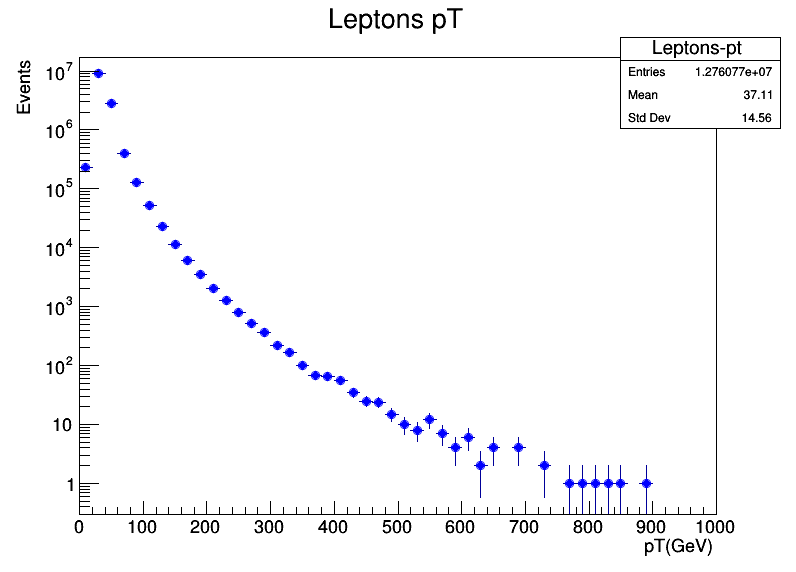

In [ ]:
hist_lepton_pt.SetMarkerStyle(20);
hist_lepton_pt.SetMarkerColor(4);
hist_lepton_pt.Draw('E');
canvas.SetLogy();
canvas.Draw();
canvas.Print("hist_lepton_pt.pdf");

Info in <TCanvas::Print>: pdf file hist_lepton_ptcone30.pdf has been created


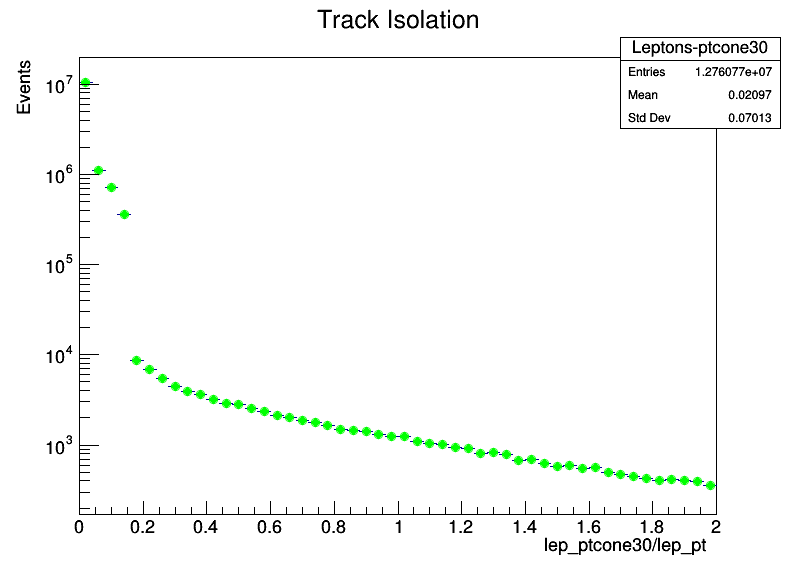

In [ ]:
hist_lepton_ptcone30.SetMarkerStyle(20);
hist_lepton_ptcone30.SetMarkerColor(3);
hist_lepton_ptcone30.Draw('E');
canvas.Draw();
canvas.Print("hist_lepton_ptcone30.pdf");

Info in <TCanvas::Print>: pdf file hist_lepton_etcone20.pdf has been created


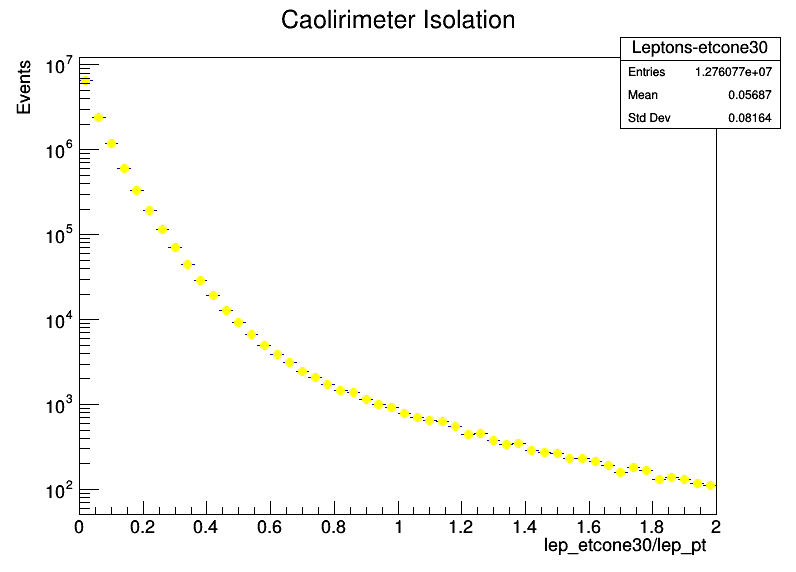

In [ ]:
hist_lepton_etcone20.SetMarkerStyle(20);
hist_lepton_etcone20.SetMarkerColor(5);
hist_lepton_etcone20.Draw('E');
canvas.Draw();
canvas.Print("hist_lepton_etcone20.pdf");

Info in <TCanvas::Print>: pdf file hist_lepton_eta.pdf has been created


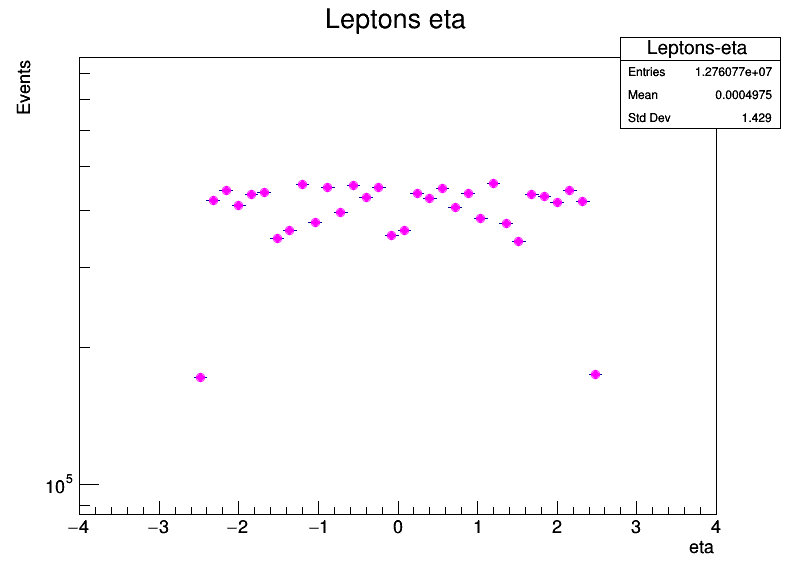

In [ ]:
hist_lepton_eta.SetMarkerStyle(20);
hist_lepton_eta.SetMarkerColor(6);
hist_lepton_eta.Draw('E');
canvas.Draw();
canvas.Print("hist_lepton_eta.pdf");

Plotting the histograms for jets:

Info in <TCanvas::Print>: pdf file hist_njets.pdf has been created


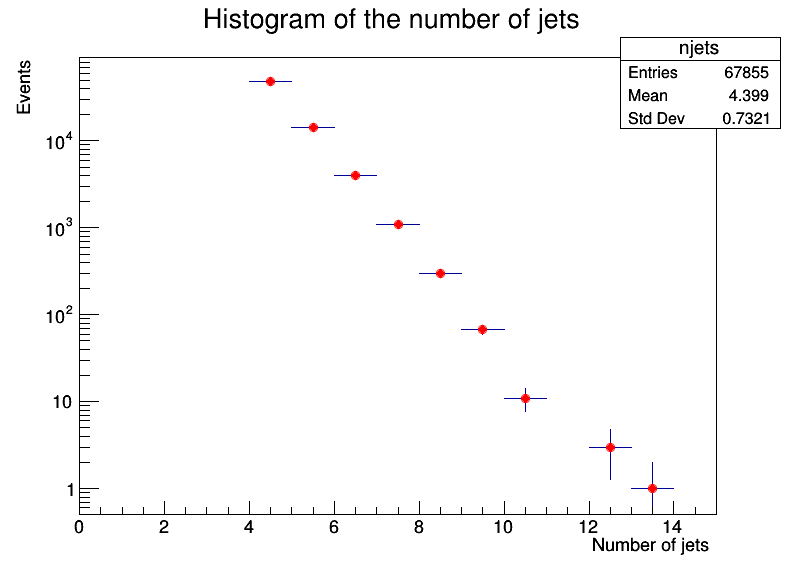

In [ ]:
hist_njets.SetMarkerStyle(20);
hist_njets.SetMarkerColor(2);
hist_njets.Draw('E');
canvas.Draw();
canvas.Print("hist_njets.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_pt.pdf has been created


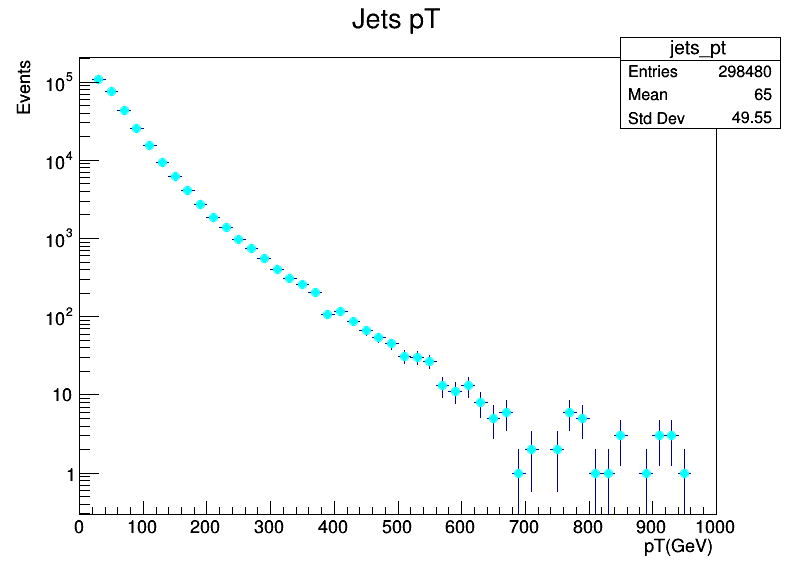

In [ ]:
hist_jets_pt.SetMarkerStyle(20);
hist_jets_pt.SetMarkerColor(7);
hist_jets_pt.Draw('E');
canvas.Draw();
canvas.Print("hist_jets_pt.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_eta.pdf has been created


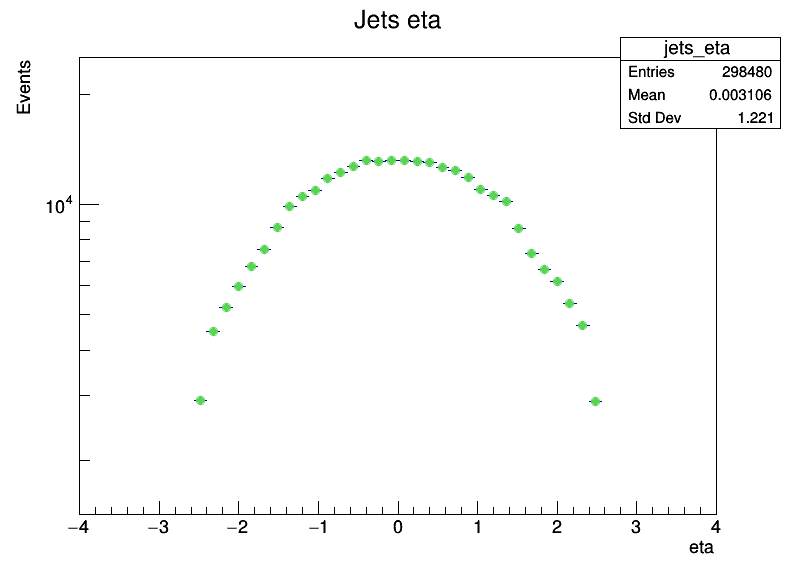

In [ ]:
hist_jets_eta.SetMarkerStyle(20);
hist_jets_eta.SetMarkerColor(8);
hist_jets_eta.Draw('E');
canvas.Draw();
canvas.Print("hist_jets_eta.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_jvf.pdf has been created


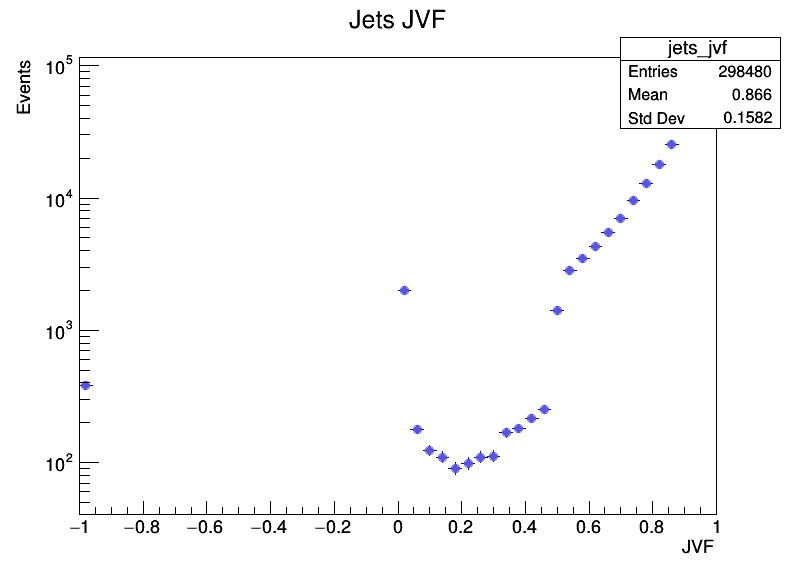

In [ ]:
hist_jets_jvf.SetMarkerStyle(20);
hist_jets_jvf.SetMarkerColor(9);
hist_jets_jvf.Draw('E');
canvas.Draw();
canvas.Print("hist_jets_jvf.pdf");

Info in <TCanvas::Print>: pdf file hist_jets_mv1.pdf has been created


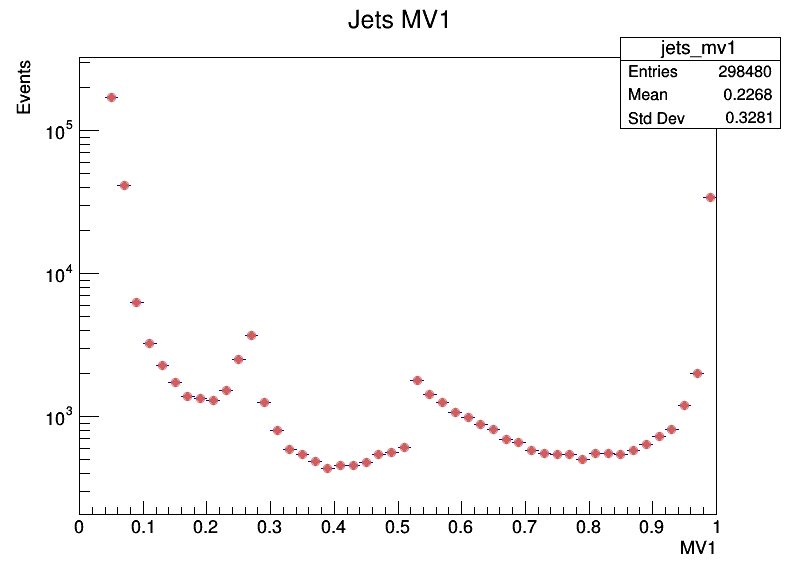

In [ ]:
hist_jets_mv1.SetMarkerStyle(20);
hist_jets_mv1.SetMarkerColor(46);
hist_jets_mv1.Draw('E');
canvas.Draw();
canvas.Print("hist_jets_mv1.pdf");

Info in <TCanvas::Print>: pdf file hist_nbjets.pdf has been created


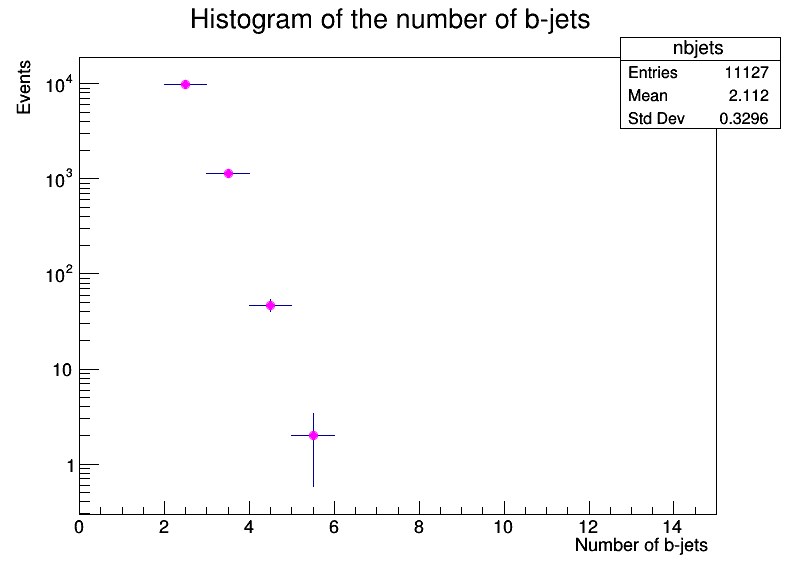

In [ ]:
hist_nbjets.SetMarkerStyle(20);
hist_nbjets.SetMarkerColor(6);
hist_nbjets.Draw('E');
canvas.Draw();
canvas.Print("hist_nbjets.pdf");

Ploting the histograms for the missing transverse energy (M$E_{T}$) and the transverse mass of W boson ($m_{T}(W)$):

In [ ]:
canvas.SetLogy(0)

Info in <TCanvas::Print>: pdf file hist_MET.pdf has been created


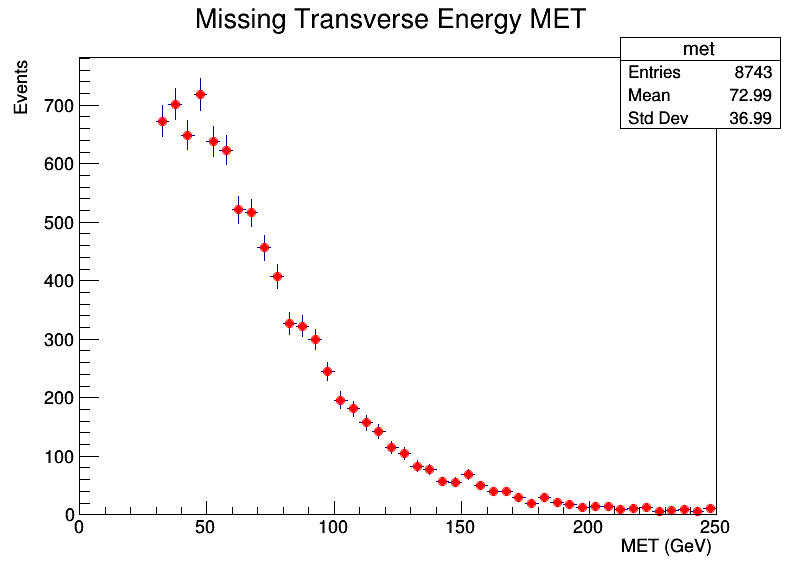

In [ ]:
hist_met.SetMarkerStyle(20);
hist_met.SetMarkerColor(2);
hist_met.Draw('E');
canvas.Draw();
canvas.Print("hist_MET.pdf");

Info in <TCanvas::Print>: pdf file hist_mtw.pdf has been created


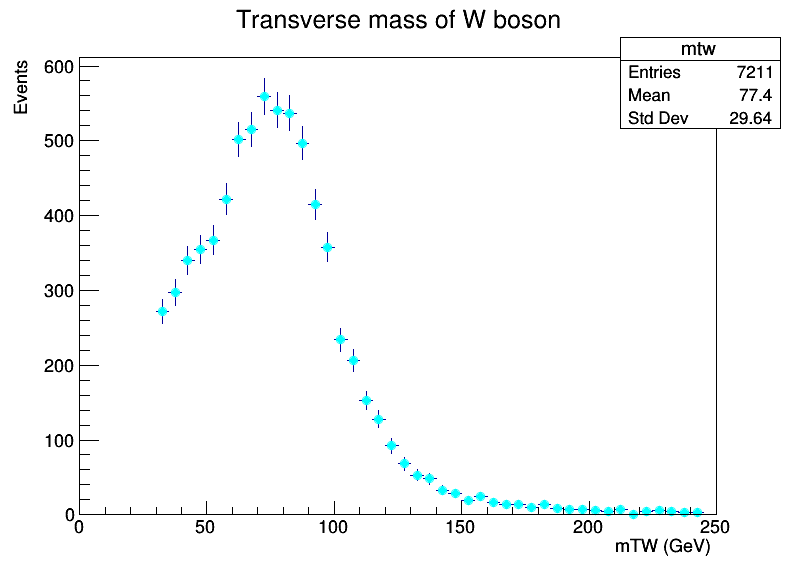

In [ ]:
hist_mtw.SetMarkerStyle(20);
hist_mtw.SetMarkerColor(7);
hist_mtw.Draw('E');
canvas.Draw();
canvas.Print("hist_mtw.pdf");

And finally, plotting the cutflow:

Info in <TCanvas::Print>: pdf file cutflow.pdf has been created


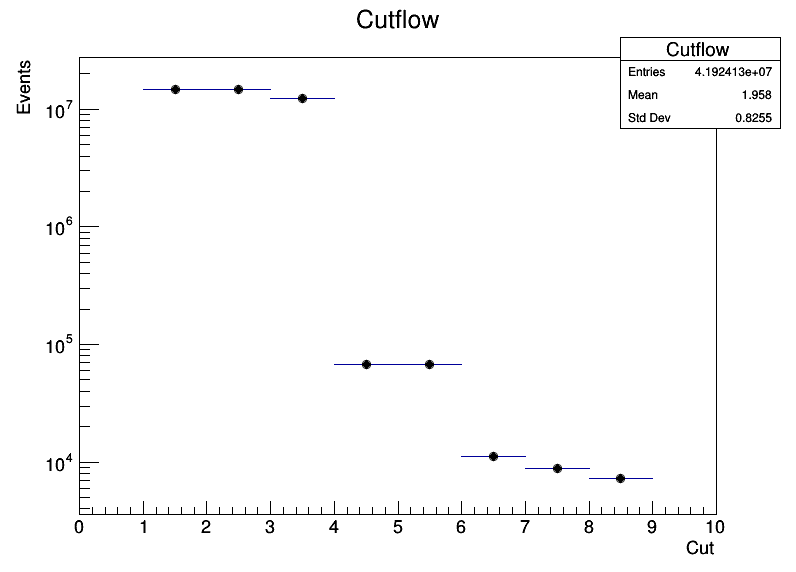

In [ ]:
canvas.SetLogy(1);
cutflow.SetMarkerStyle(20);
cutflow.SetMarkerColor();
cutflow.Draw('E');
canvas.Draw();
canvas.Print("cutflow.pdf");

**Analysis for the MC events:**

First, it is necessary to open the data with MC events:

In [46]:
FM=ROOT.TFile.Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/ttbar_8TeV.root")

Let's see the tree and branches:

In [47]:
treeM=FM.Get("mini")
treeM.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

Now, let's see how many MC events we are dealing with:

In [48]:
print('Number of MC Events:',treeM.GetEntries())

Number of MC Events: 1500000


As we can see, in fact, this sample of MC events is smaller than the actual data (1500000 < 14945674), but there's no problem because the total number of MC events is bigger.

Let's apply an **analogous analysis** for MC events, but taking into account the **event weights** and **re-scaling** requirements to fill the histograms and be able to compare MC events with the actual data.

Recalling that for MC events the weight is defined as:

\begin{equation}
w = \frac{L^{Data}}{L^{MC}}
\end{equation}

With $L$ the luminosity. 

Now, we have that the actual data for the "ttbar-1lepSelection-8TeV" is:

\begin{equation}
L^{Data} = 1 fb^{-1} = 1 \times 10^{15} b^{-1}
\end{equation}

And to compare with the luminosity of MC events, we consider that the number of MC events are proportional to the associated luminosity and cross section:

\begin{equation}
N_{events}^{MC}\cdot f = \sigma \cdot L^{MC}
\end{equation}

With $f$ the "filter" which is a measure of the efficiency of all the kinematic requirements applied to event generation, and we have its value $f=0.072212854$, and $\sigma$ the cross section of the process, which we know that is $\sigma = 137.29749 pb = 137.29749 \times 10^{-12}b$. We also know the number of MC events, which is $N_{events}=49761200.21$. Therefore, we can compute the luminosity of MC events as:

\begin{equation}
L^{MC} = \frac{N_{events}^{MC}f}{\sigma}
\end{equation}

\begin{equation}
L^{MC} \approx 2.6172 \times 10^{16} b^{-1} = 26.172 fb^{-1}
\end{equation}

Thus, with this result we can finally compute the weight for MC events:

\begin{equation}
w = \frac{L^{Data}}{L^{MC}} = \frac{1 fb^{-1}}{26.172 fb^{-1}} = 0.0382
\end{equation}

And this value will be include to fill the histograms, taking into account the **scale factor** for each event as well.


In [49]:
w=0.0382

Let's create the histograms for distributions:

In [50]:
#Histograms for leptons:
hist_MClepton_pt=ROOT.TH1F("MCLeptons-pt","MC Leptons pT; pT(GeV); Events",50,0,1000)
hist_MClepton_ptcone30=ROOT.TH1F("MCLeptons-ptcone30","MC Track Isolation; lep_ptcone30/lep_pt; Events",50,0,2) 
hist_MClepton_etcone20=ROOT.TH1F("MCLeptons-etcone30","MC Calorimeter Isolation; lep_etcone30/lep_pt; Events",50,0,2) 
hist_MClepton_eta=ROOT.TH1F("MCLeptons-eta","MC Leptons eta; eta; Events",50,-4,4)

In [51]:
#Histograms for jets:
hist_MCnjets=ROOT.TH1F("MCnjets","Histogram of the number of MC jets; Number of jets; Events",15,0,15)
hist_MCjets_pt=ROOT.TH1F("MCjets_pt","MC Jets pT; pT(GeV); Events",50,0,1000)
hist_MCjets_eta=ROOT.TH1F("MCjets_eta","MC Jets eta; eta; Events",50,-4,4)
hist_MCjets_jvf=ROOT.TH1F("MCjets_jvf","MC Jets JVF; JVF; Events",50,-1,1)
hist_MCjets_mv1=ROOT.TH1F("MCjets_mv1","MC Jets MV1; MV1; Events",50,0,1)
hist_MCnbjets=ROOT.TH1F("MCnbjets","Histogram of the number of MC b-jets; Number of b-jets; Events",15,0,15)

In [52]:
#Histogram for MET:
hist_MCmet=ROOT.TH1F("MCmet","MC Missing Transverse Energy MET; MET (GeV); Events",50,0,250)

In [53]:
#Histogram for mT(W):
hist_MCmtw=ROOT.TH1F("MCmtw","MC Transverse mass of W boson; mTW (GeV); Events",50,0,250)

In [54]:
#Histogram for the cutflow of MC events:
cutflowMC=ROOT.TH1F("CutflowMC","MC Cutflow; Cut; Events",10,0,10)

Let's run the cutflow histogram including the event scales and weight, with also lepton scales because our lepton histograms include both, electron and muon:



In [55]:
cutmc1=0;
cutmc2=0;
cutmc3=0;
cutmc4=0;
cutmc5=0;
cutmc6=0;
cutmc7=0;
cutmc8=0;



for event in treeM:
  
  #Define the scale factors (of event) and include the weight to fill the cutflow:
  scalefactor=treeM.scaleFactor_PILEUP*treeM.scaleFactor_TRIGGER*treeM.scaleFactor_BTAG*treeM.scaleFactor_ZVERTEX*treeM.scaleFactor_MUON*treeM.scaleFactor_ELE;
  eventweight=scalefactor*w*treeM.mcWeight;

  #First cut: Good vertex
  if not treeM.hasGoodVertex:
    continue
  cutmc1+=1;
  cutflowMC.Fill(1,eventweight);

  #Second cut: Trigger
  if not treeM.trigE and not treeM.trigM:
    continue
  cutmc2+=1;
  cutflowMC.Fill(2,eventweight); 

  # Preselection of good leptons and loop over leptons:
  n_MCmu=0;
  n_MCel=0;
  n_MClep=0;

  for i in range(0,treeM.lep_n):
    if treeM.lep_pt[i]<25000.:
      continue
    if treeM.lep_ptcone30[i]/treeM.lep_pt[i]>0.15:
      continue
    if treeM.lep_type[i]==13 and abs(treeM.lep_eta[i])<2.5:
      n_MCmu+=1;
    if treeM.lep_type[i]==11 and abs(treeM.lep_eta[i])<2.47 and (abs(treeM.lep_eta[i])<1.37 or abs(treeM.lep_eta[i])>1.52):
      n_MCel+=1;
    n_MClep+=1;
  
  #Select events with only 1 good lepton and fill the cutflow histogram

  #Third cut (one good lepton)
  if n_MClep!=1:
    continue
  cutflowMC.Fill(3,eventweight);
  cutmc3+=1;

  #Fill histograms for leptons:
  scalefactor=treeM.scaleFactor_PILEUP*treeM.scaleFactor_TRIGGER*treeM.scaleFactor_BTAG*treeM.scaleFactor_ZVERTEX*treeM.scaleFactor_MUON*treeM.scaleFactor_ELE;
  eventweight=scalefactor*w*treeM.mcWeight;
  for m in range(0,treeM.lep_n):
    hist_MClepton_pt.Fill(treeM.lep_pt[m]/1000,eventweight)
    hist_MClepton_ptcone30.Fill(treeM.lep_ptcone30[m]/treeM.lep_pt[m],eventweight)
    hist_MClepton_etcone20.Fill(treeM.lep_etcone20[m]/treeM.lep_pt[m],eventweight)
    hist_MClepton_eta.Fill(treeM.lep_eta[m],eventweight)

  n_MCjets=0;
  n_MCbjets=0;
  
  #Fourth cut: At least 4 jets
  if treeM.jet_n<4:
    continue
  cutflowMC.Fill(4,eventweight);
  cutmc4+=1;

  for j in range(0,treeM.jet_n):
    if treeM.jet_pt[j]<25000.:
      continue 
    #To complete: apply jet cuts to find the good jets
    if abs(treeM.jet_eta[j])>2.5:
      continue
    if treeM.jet_pt[j]<50000. and abs(treeM.jet_eta[j])<2.4:
      if treeM.jet_jvf[j]<0.5:
        continue
    n_MCjets+=1;
    #And at least two b-jets:
    if treeM.jet_MV1[j]<0.7892:
      continue
    n_MCbjets+=1;

  #Fifth cut: At least 4 good jets
  if n_MCjets<4:
    continue
  cutflowMC.Fill(5,eventweight);
  cutmc5+=1;

  #Fill histograms for jets:
  hist_MCnjets.Fill(treeM.jet_n,eventweight);
  for k in range(0,treeM.jet_n):
    hist_MCjets_pt.Fill(treeM.jet_pt[k]/1000,eventweight);
    hist_MCjets_eta.Fill(treeM.jet_eta[k],eventweight);
    hist_MCjets_jvf.Fill(treeM.jet_jvf[k],eventweight);
    hist_MCjets_mv1.Fill(treeM.jet_MV1[k],eventweight);

  #Sixth cut: at least one b-jet
  #hist_nbjets.Fill(n_bjets);

  if n_MCbjets<2:
    continue
  cutflowMC.Fill(6,eventweight);
  cutmc6+=1;

  #Fill histogram for b-jets:
  hist_MCnbjets.Fill(n_MCbjets,eventweight);

  #Seventh cut: MET > 30 GeV
  if treeM.met_et<30000.:
    continue
  cutflowMC.Fill(7,eventweight);
  cutmc7+=1;

  #Fill histogram for MET:
  hist_MCmet.Fill(treeM.met_et/1000,eventweight);

  #TLorentzVector definitions
  MCLepton=ROOT.TLorentzVector();
  MCLepton.SetPtEtaPhiE(treeM.lep_pt[i],treeM.lep_eta[i],treeM.lep_phi[i],treeM.lep_E[i]);
  MCMeT=ROOT.TLorentzVector();
  MCMeT.SetPtEtaPhiE(treeM.met_et,0,treeM.met_phi,treeM.met_et)
    

  #Calculation of the mTW using TLorentz vectors             
  MCmTW=math.sqrt(2*MCLepton.Pt()*MCMeT.Et()*(1-math.cos(MCLepton.DeltaPhi(MCMeT))));

  #Eighth cut:
  #hist_mtw.Fill(mTW/1000); 
  if MCmTW<30000:
    continue
  cutflowMC.Fill(8,eventweight);
  cutmc8+=1;

  #Fill histogram for M_T(W)
  hist_MCmtw.Fill(MCmTW/1000,eventweight);


print("All done.")
print('All MC events:',treeM.GetEntries())
print('cut1=',cutmc1)
print('cut2=',cutmc2)
print('cut3=',cutmc3)
print('cut4=',cutmc4)
print('cut5=',cutmc5)
print('cut6=',cutmc6)
print('cut7=',cutmc7)
print('cut8=',cutmc8)

All done.
All MC events: 1500000
cut1= 1499487
cut2= 1499487
cut3= 1349120
cut4= 630082
cut5= 628928
cut6= 262622
cut7= 216808
cut8= 180973


Info in <TCanvas::Print>: pdf file MC-cutflow.pdf has been created


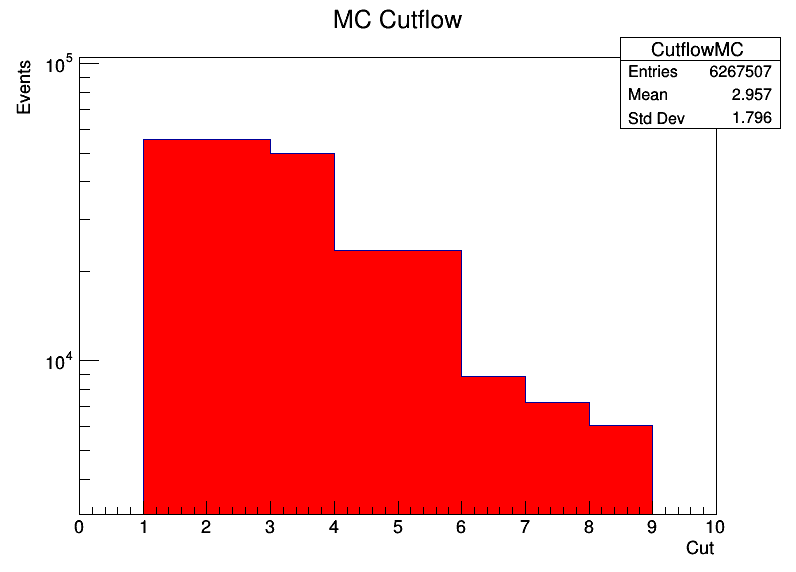

In [56]:
cutflowMC.SetFillColor(2);
cutflowMC.Draw('HIST');
canvas.SetLogy(1);
canvas.Draw();
canvas.Print("MC-cutflow.pdf");

And then compare it with the obtained for the actual data:

Info in <TCanvas::Print>: pdf file cutflow_MC_vs_Data.pdf has been created


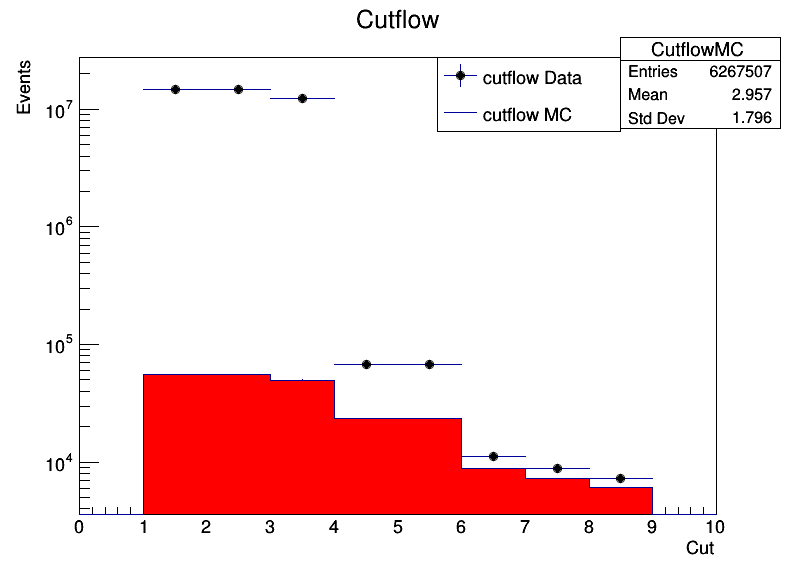

In [57]:
cutflow.SetMarkerStyle(20);
cutflow.Draw('E');
cutflowMC.Draw('sameH');
legendcutflow=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendcutflow.AddEntry(cutflow,"cutflow Data","lep");
legendcutflow.AddEntry(cutflowMC,"cutflow MC","l");
legendcutflow.Draw();
canvas.Draw();
canvas.Print("cutflow_MC_vs_Data.pdf");

Now, all is ready to fill the histograms:

Plotting the distributions for leptons:

Info in <TCanvas::Print>: pdf file hist_MClepton_pt.pdf has been created


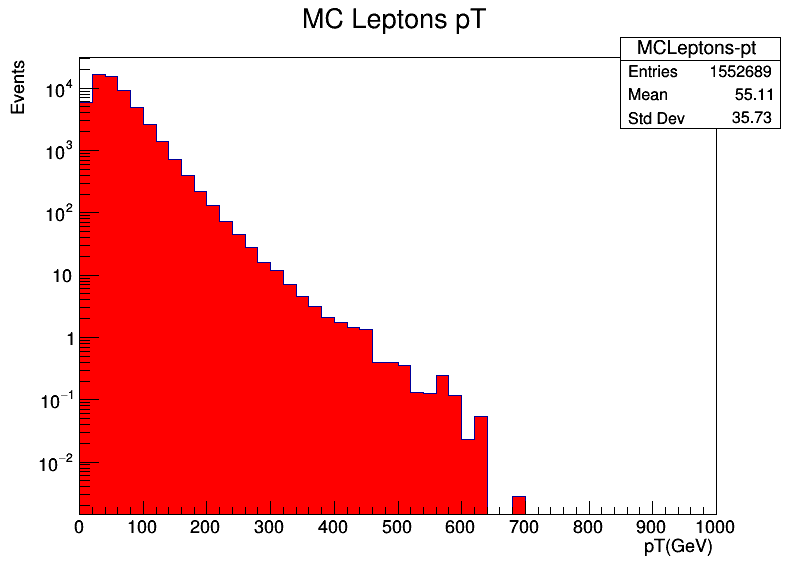

In [58]:
hist_MClepton_pt.SetFillColor(2);
hist_MClepton_pt.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MClepton_pt.pdf");

Info in <TCanvas::Print>: pdf file hist_MClepton_ptcone30.pdf has been created


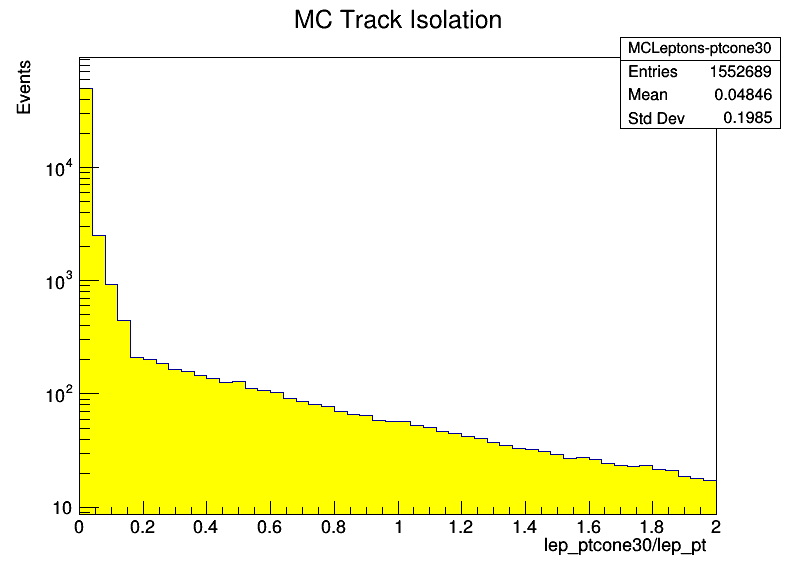

In [59]:
hist_MClepton_ptcone30.SetFillColor(5);
hist_MClepton_ptcone30.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MClepton_ptcone30.pdf");

Info in <TCanvas::Print>: pdf file hist_MClepton_etcone20.pdf has been created


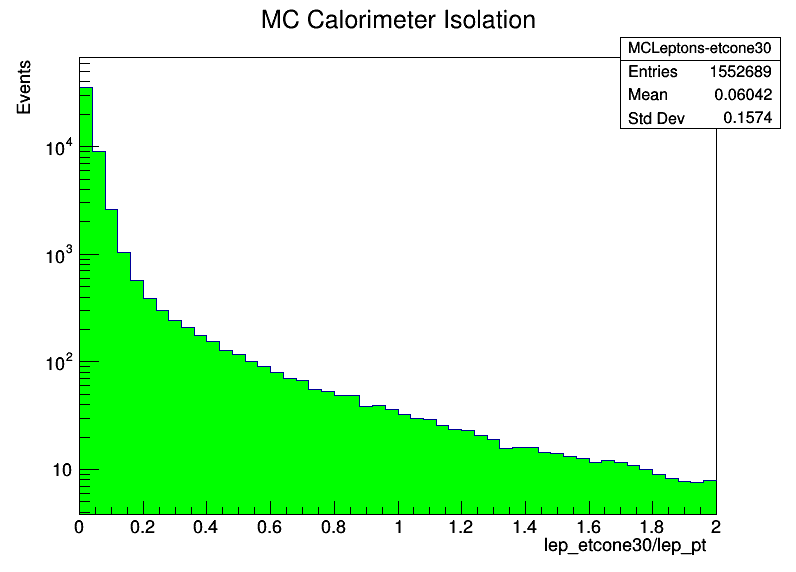

In [60]:
hist_MClepton_etcone20.SetFillColor(3);
hist_MClepton_etcone20.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MClepton_etcone20.pdf");

Info in <TCanvas::Print>: pdf file hist_MClepton_eta.pdf has been created


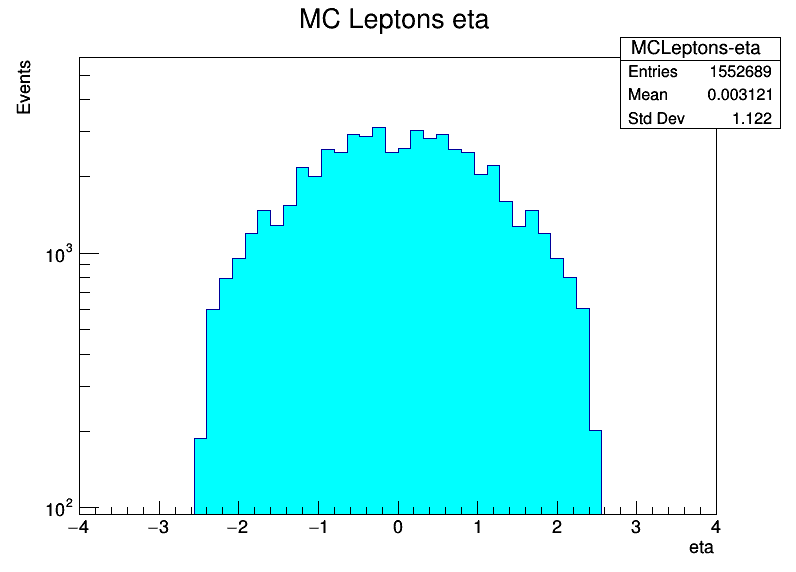

In [61]:
hist_MClepton_eta.SetFillColor(7);
hist_MClepton_eta.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MClepton_eta.pdf");

Plotting the distributions for jets:

Info in <TCanvas::Print>: pdf file hist_MCnjets.pdf has been created


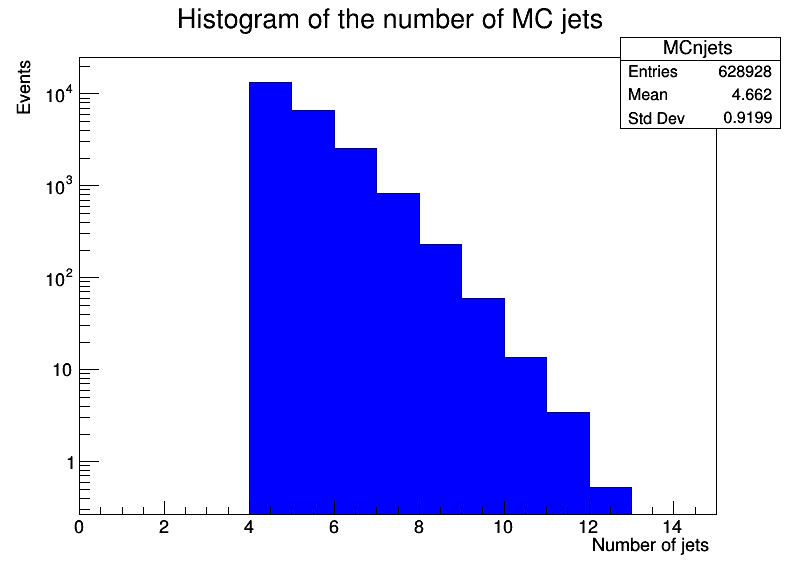

In [62]:
hist_MCnjets.SetFillColor(4);
hist_MCnjets.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCnjets.pdf");

Info in <TCanvas::Print>: pdf file hist_MCjets_pt.pdf has been created


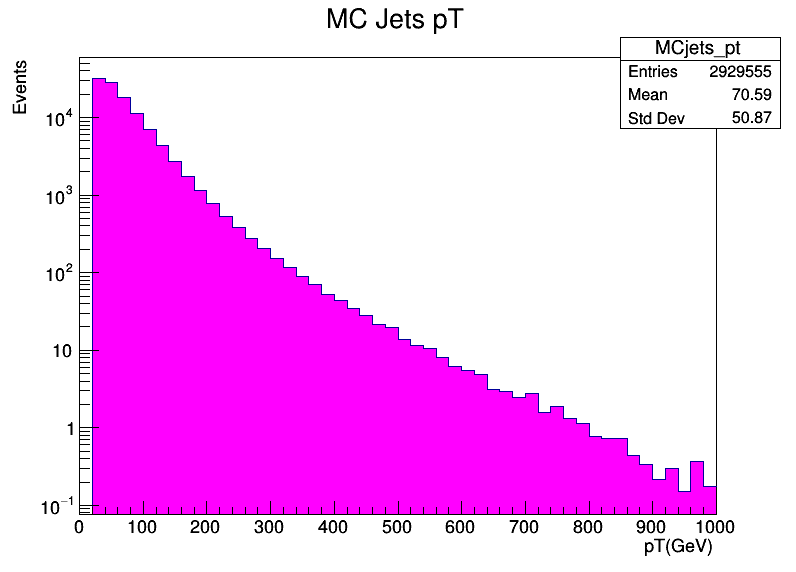

In [63]:
hist_MCjets_pt.SetFillColor(6);
hist_MCjets_pt.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCjets_pt.pdf");

Info in <TCanvas::Print>: pdf file hist_MCjets_eta.pdf has been created


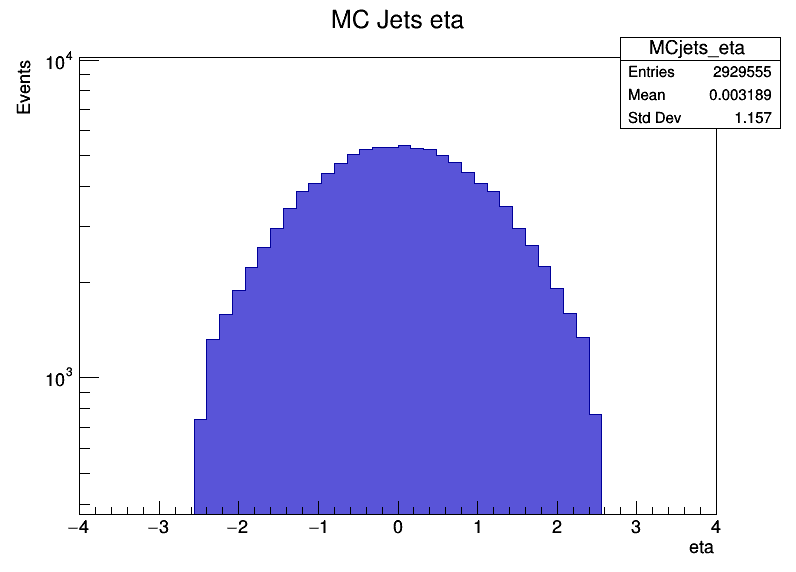

In [64]:
hist_MCjets_eta.SetFillColor(9);
hist_MCjets_eta.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCjets_eta.pdf");

Info in <TCanvas::Print>: pdf file hist_MCjets_jvf.pdf has been created


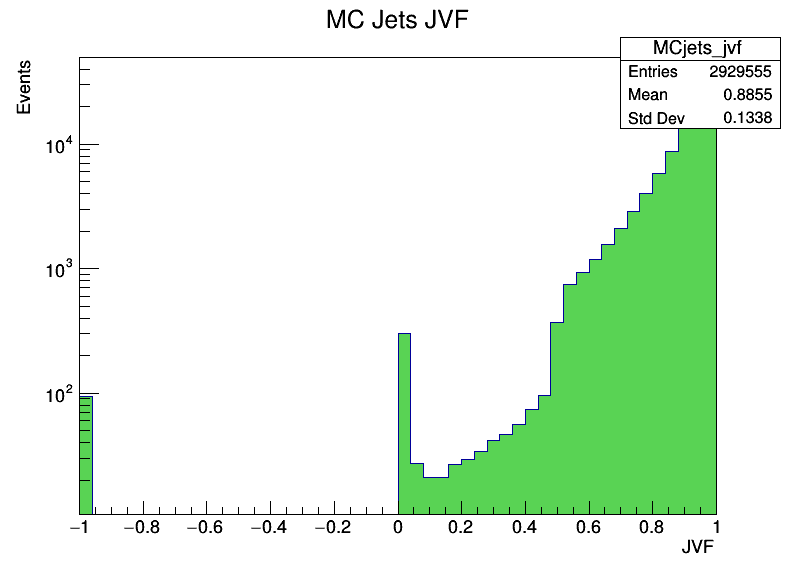

In [65]:
hist_MCjets_jvf.SetFillColor(8);
hist_MCjets_jvf.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCjets_jvf.pdf");

Info in <TCanvas::Print>: pdf file hist_MCjets_mv1.pdf has been created


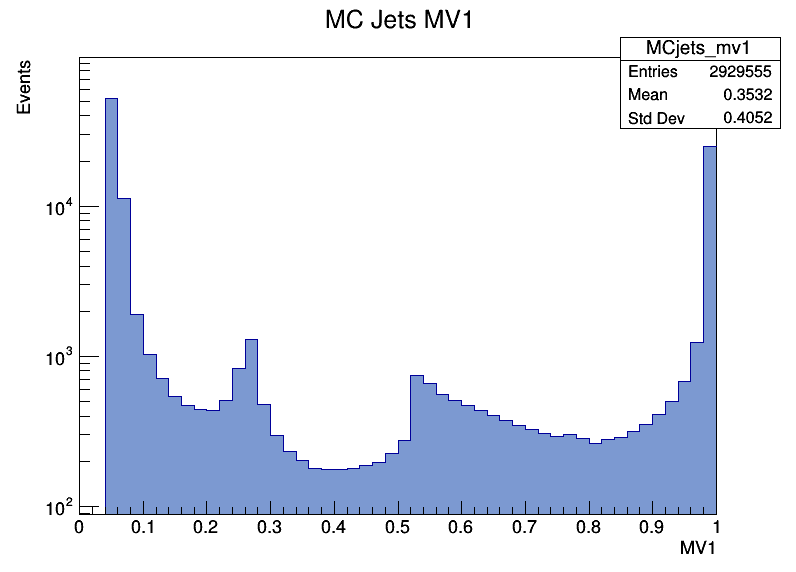

In [66]:
hist_MCjets_mv1.SetFillColor(38);
hist_MCjets_mv1.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCjets_mv1.pdf");

Info in <TCanvas::Print>: pdf file hist_MCnbjets.pdf has been created


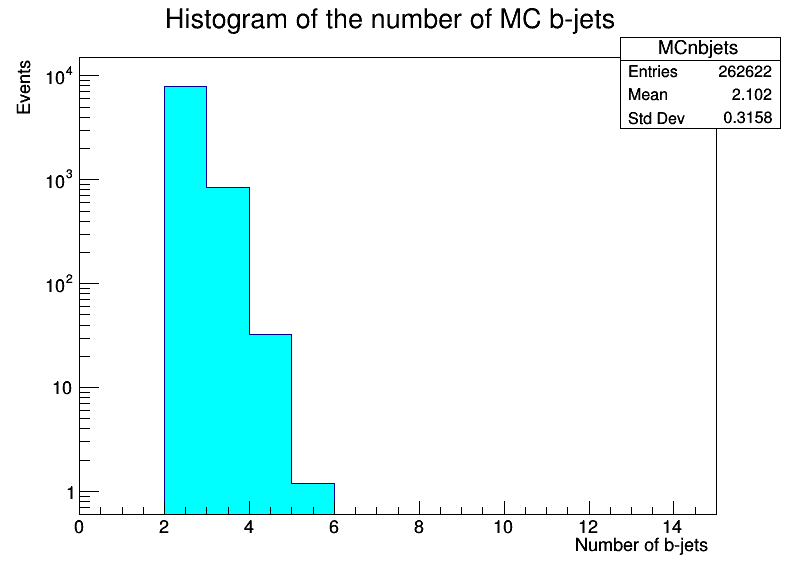

In [67]:
hist_MCnbjets.SetFillColor(7);
hist_MCnbjets.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCnbjets.pdf");

Plotting the Missing $E_{T}$:

In [68]:
canvas.SetLogy(0)

Info in <TCanvas::Print>: pdf file hist_MCmet.pdf has been created


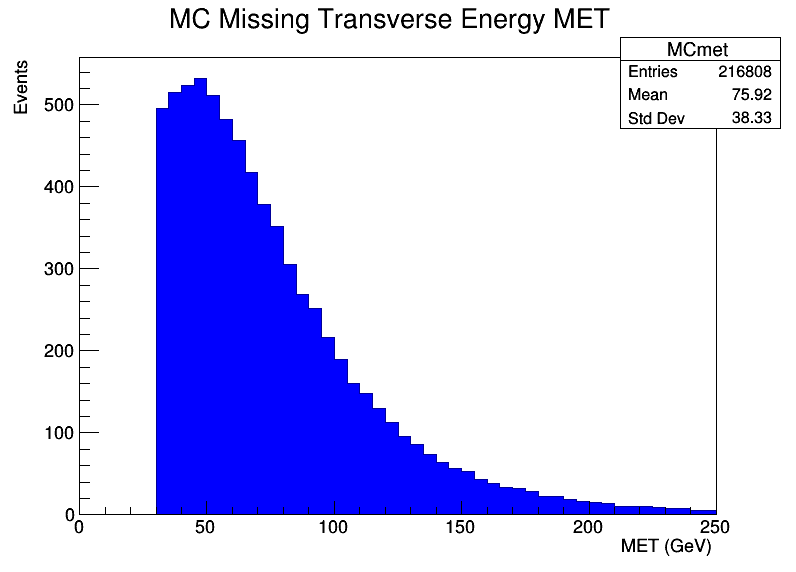

In [69]:
hist_MCmet.SetFillColor(4);
hist_MCmet.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCmet.pdf");

Plotting the $m_{T}(W)$:

Info in <TCanvas::Print>: pdf file hist_MCmtw.pdf has been created


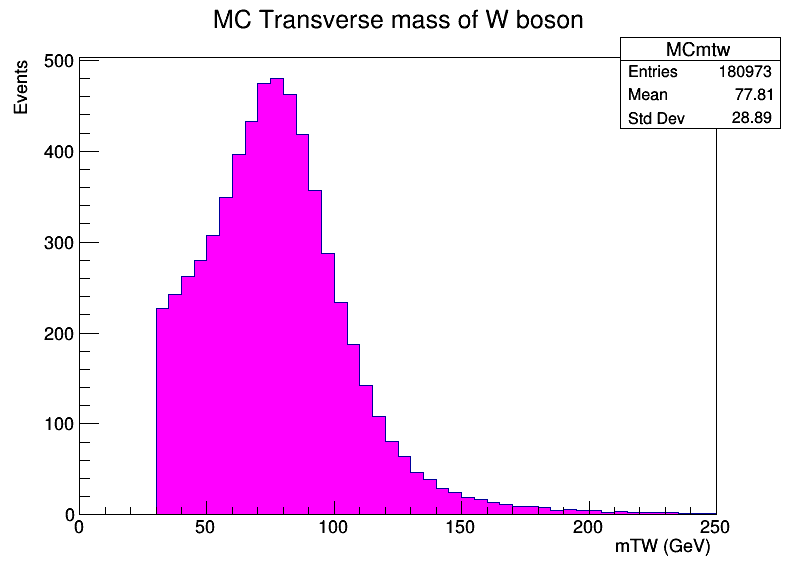

In [70]:
hist_MCmtw.SetFillColor(6);
hist_MCmtw.Draw('HIST');
canvas.Draw();
canvas.Print("hist_MCmtw.pdf");

Then, for each distribution plot let's compare in the same histogram **DATA vs. MC**:

Comparison for lepton $p_{T}$:

In [71]:
canvas.SetLogy(1);

Info in <TCanvas::Print>: pdf file Leptons_pT_MC_vs_Data.pdf has been created


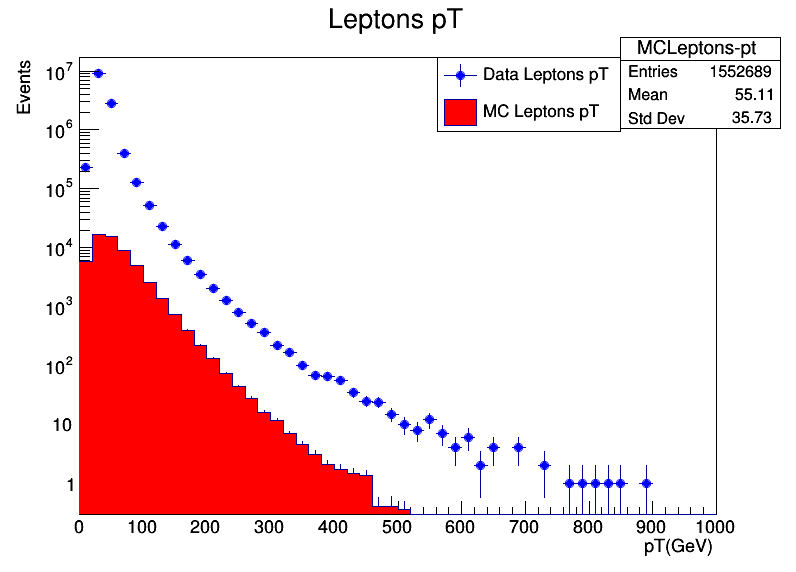

In [75]:
hist_lepton_pt.SetMarkerStyle(20);
hist_lepton_pt.SetMarkerColor(4);
hist_lepton_pt.Draw('E');
#hist_MClepton_pt.SetMarkerStyle(20);
hist_MClepton_pt.SetFillColor(2);
hist_MClepton_pt.Draw('sameH');
legendlep=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendlep.AddEntry(hist_lepton_pt,"Data Leptons pT","lep");
legendlep.AddEntry(hist_MClepton_pt,"MC Leptons pT","f");
legendlep.Draw();
canvas.Draw();
canvas.Print("Leptons_pT_MC_vs_Data.pdf");

Comparison for lepton track isolation:

Info in <TCanvas::Print>: pdf file Leptons_TrackIsolation_MC_vs_Data.pdf has been created


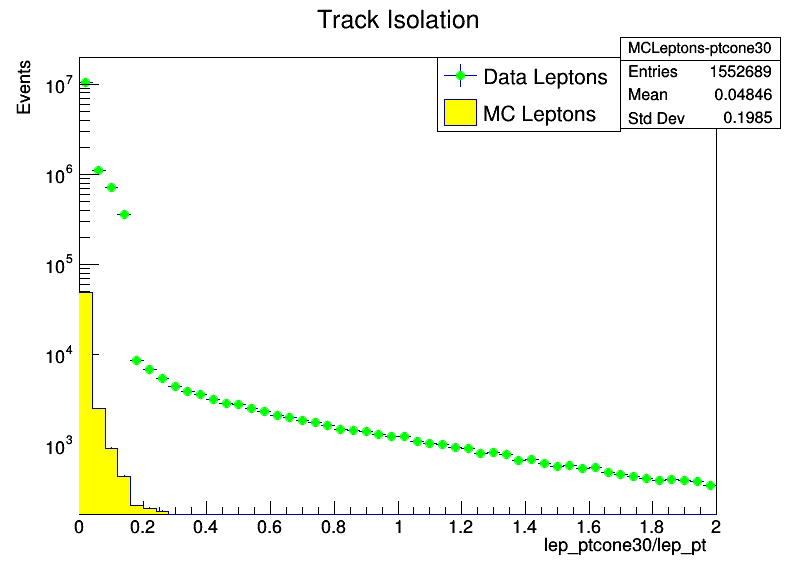

In [76]:
hist_lepton_ptcone30.SetMarkerStyle(20);
hist_lepton_ptcone30.SetMarkerColor(3);
hist_lepton_ptcone30.Draw('E');
hist_MClepton_ptcone30.SetFillColor(5);
hist_MClepton_ptcone30.Draw('sameH');
legendlepti=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendlepti.AddEntry(hist_lepton_ptcone30,"Data Leptons","lep");
legendlepti.AddEntry(hist_MClepton_ptcone30,"MC Leptons","f");
legendlepti.Draw();
canvas.Draw();
canvas.Print("Leptons_TrackIsolation_MC_vs_Data.pdf");

Comparison for lepton calorimeter isolation:

Info in <TCanvas::Print>: pdf file Leptons_CalorimeterIsolation_MC_vs_Data.pdf has been created


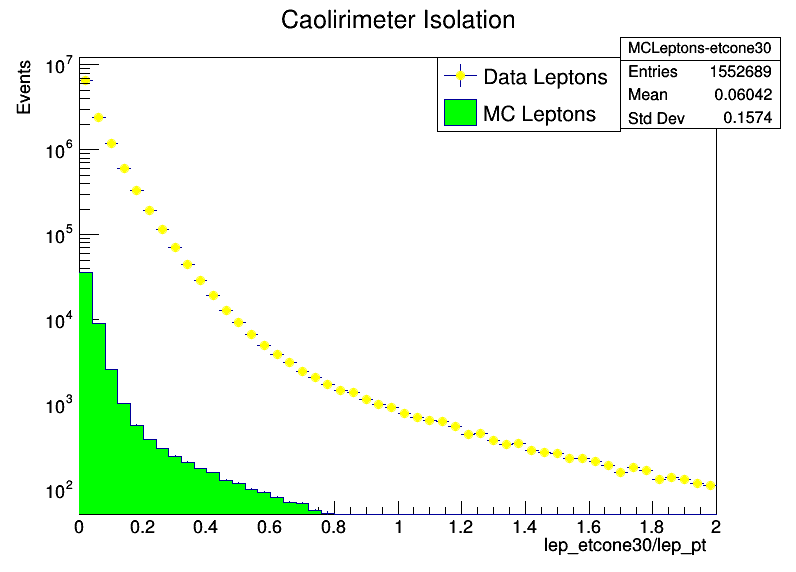

In [77]:
hist_lepton_etcone20.SetMarkerStyle(20);
hist_lepton_etcone20.SetMarkerColor(5);
hist_lepton_etcone20.Draw('E');
hist_MClepton_etcone20.SetFillColor(3);
hist_MClepton_etcone20.Draw('sameH');
legendlepci=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendlepci.AddEntry(hist_lepton_etcone20,"Data Leptons","lep");
legendlepci.AddEntry(hist_MClepton_etcone20,"MC Leptons","f");
legendlepci.Draw();
canvas.Draw();
canvas.Print("Leptons_CalorimeterIsolation_MC_vs_Data.pdf");

Comparison for lepton $\eta$:

Info in <TCanvas::Print>: pdf file Leptons_eta_MC_vs_Data.pdf has been created


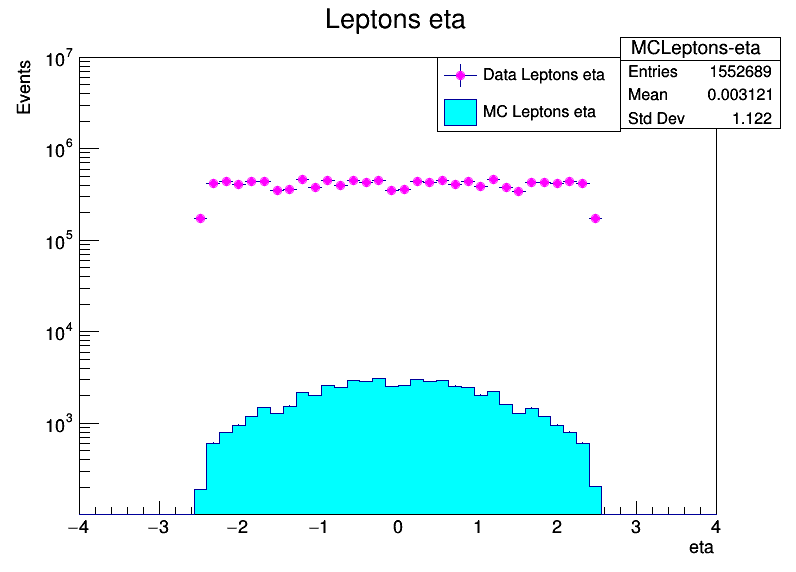

In [85]:
hist_lepton_eta.SetMarkerStyle(20);
hist_lepton_eta.SetMarkerColor(6);
hist_lepton_eta.SetMaximum(10000000);
hist_lepton_eta.SetMinimum(100);
hist_lepton_eta.Draw('E');
hist_MClepton_eta.SetFillColor(7);
hist_MClepton_eta.Draw('sameH');
legendlepeta=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendlepeta.AddEntry(hist_lepton_eta,"Data Leptons eta","lep");
legendlepeta.AddEntry(hist_MClepton_eta,"MC Leptons eta","f");
legendlepeta.Draw();
canvas.Draw();
canvas.Print("Leptons_eta_MC_vs_Data.pdf");

Comparison for the number of jets:

Info in <TCanvas::Print>: pdf file njets_MC_vs_Data.pdf has been created


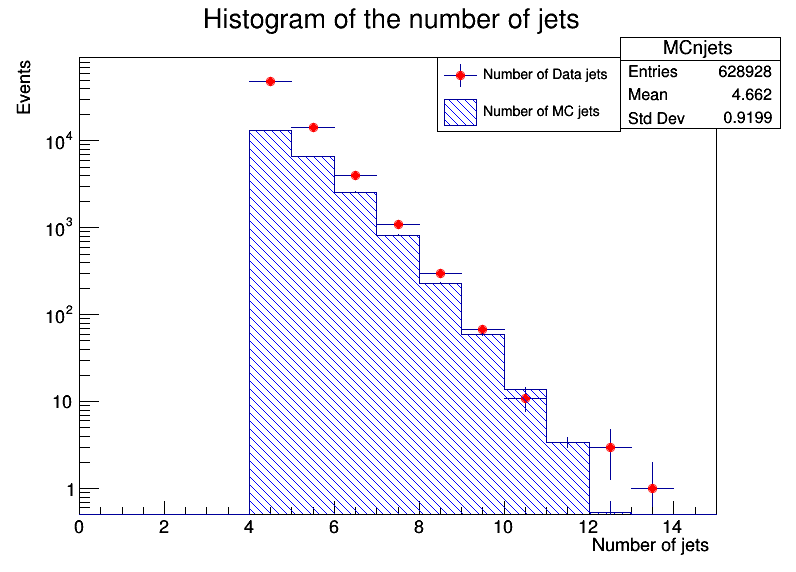

In [88]:
hist_njets.SetMarkerStyle(20);
hist_njets.SetMarkerColor(2);
hist_njets.Draw('E');
hist_MCnjets.SetFillColor(4);
hist_MCnjets.SetFillStyle(3005);
hist_MCnjets.Draw('sameH');
legendnjets=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendnjets.AddEntry(hist_njets,"Number of Data jets","lep");
legendnjets.AddEntry(hist_MCnjets,"Number of MC jets","f");
legendnjets.Draw();
canvas.Draw();
canvas.Print("njets_MC_vs_Data.pdf");

Comparison for jets $p_{T}$:

Info in <TCanvas::Print>: pdf file jetspT_MC_vs_Data.pdf has been created


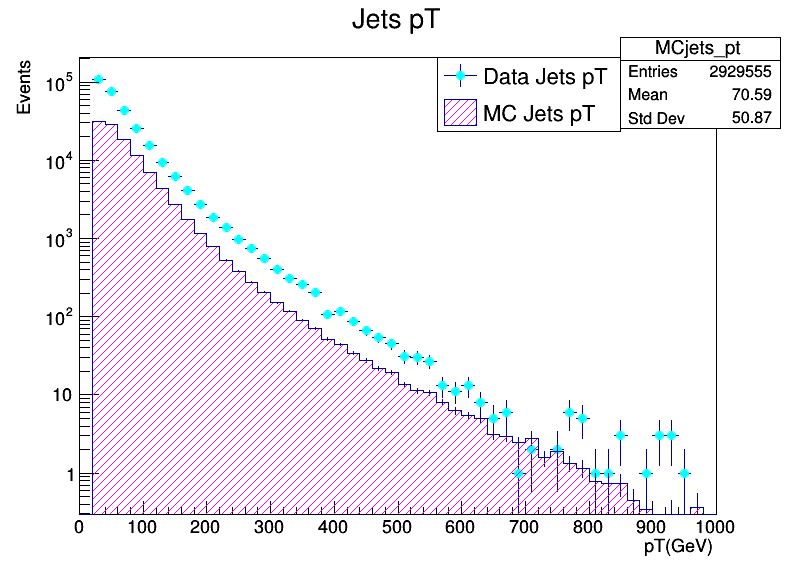

In [92]:
hist_jets_pt.SetMarkerStyle(20);
hist_jets_pt.SetMarkerColor(7);
hist_jets_pt.Draw('E');
hist_MCjets_pt.SetFillColor(6);
hist_MCjets_pt.SetFillStyle(3004);
hist_MCjets_pt.Draw('sameH');
legendjetspt=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendjetspt.AddEntry(hist_jets_pt,"Data Jets pT","lep");
legendjetspt.AddEntry(hist_MCjets_pt,"MC Jets pT","f");
legendjetspt.Draw();
canvas.Draw();
canvas.Print("jetspT_MC_vs_Data.pdf");

Comparison for jets $\eta$:

Info in <TCanvas::Print>: pdf file jetseta_MC_vs_Data.pdf has been created


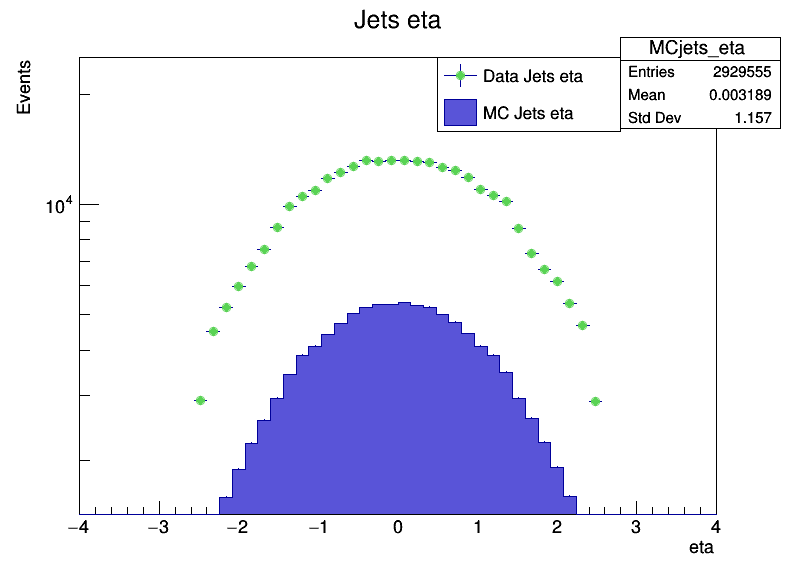

In [93]:
hist_jets_eta.SetMarkerStyle(20);
hist_jets_eta.SetMarkerColor(8);
hist_jets_eta.Draw('E');
hist_MCjets_eta.SetFillColor(9);
hist_MCjets_eta.Draw('sameH');
legendjetseta=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendjetseta.AddEntry(hist_jets_eta,"Data Jets eta","lep");
legendjetseta.AddEntry(hist_MCjets_eta,"MC Jets eta","f");
legendjetseta.Draw();
canvas.Draw();
canvas.Print("jetseta_MC_vs_Data.pdf");

Comparison for jets JVF:

Info in <TCanvas::Print>: pdf file jetsJVF_MC_vs_Data.pdf has been created


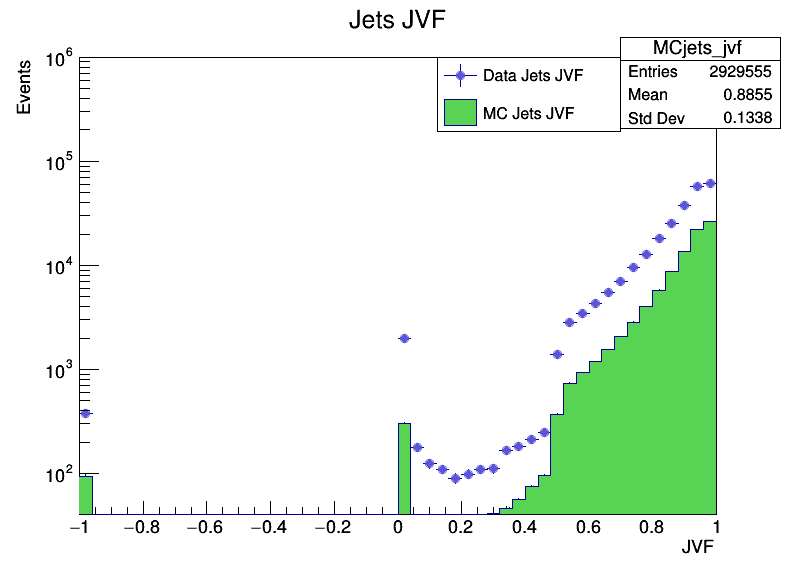

In [95]:
hist_jets_jvf.SetMarkerStyle(20);
hist_jets_jvf.SetMarkerColor(9);
hist_jets_jvf.SetMaximum(1000000);
hist_jets_jvf.Draw('E');
hist_MCjets_jvf.SetFillColor(8);
hist_MCjets_jvf.Draw('sameH');
legendjetsjvf=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendjetsjvf.AddEntry(hist_jets_jvf,"Data Jets JVF","lep");
legendjetsjvf.AddEntry(hist_MCjets_jvf,"MC Jets JVF","f");
legendjetsjvf.Draw();
canvas.Draw();
canvas.Print("jetsJVF_MC_vs_Data.pdf");

Comparison for jets MV1 output:

Info in <TCanvas::Print>: pdf file jetsMV1_MC_vs_Data.pdf has been created


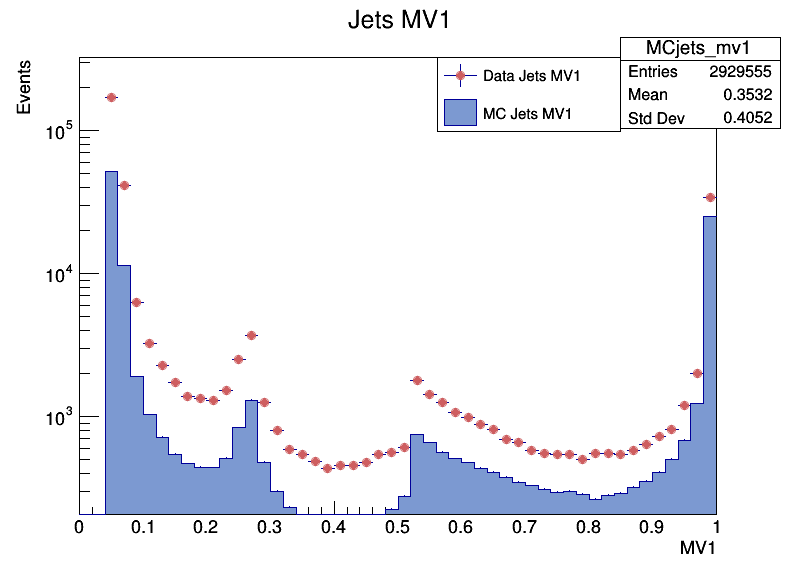

In [97]:
hist_jets_mv1.SetMarkerStyle(20);
hist_jets_mv1.SetMarkerColor(46);
hist_jets_mv1.Draw('E');
hist_MCjets_mv1.SetFillColor(38);
hist_MCjets_mv1.Draw('sameH');
legendjetsmv1=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendjetsmv1.AddEntry(hist_jets_mv1,"Data Jets MV1","lep");
legendjetsmv1.AddEntry(hist_MCjets_mv1,"MC Jets MV1","f");
legendjetsmv1.Draw();
canvas.Draw();
canvas.Print("jetsMV1_MC_vs_Data.pdf");

Comparison for the number of b-jets:

Info in <TCanvas::Print>: pdf file nbjets_MC_vs_Data.pdf has been created


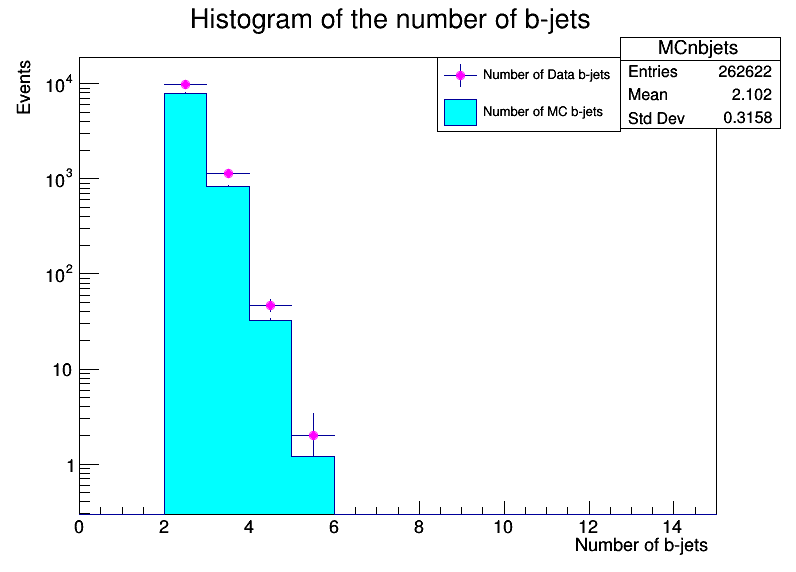

In [99]:
hist_nbjets.SetMarkerStyle(20);
hist_nbjets.SetMarkerColor(6);
hist_nbjets.Draw('E');
hist_MCnbjets.SetFillColor(7);
hist_MCnbjets.Draw('sameH');
legendnbjets=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendnbjets.AddEntry(hist_nbjets,"Number of Data b-jets","lep");
legendnbjets.AddEntry(hist_MCnbjets,"Number of MC b-jets","f");
legendnbjets.Draw();
canvas.Draw();
canvas.Print("nbjets_MC_vs_Data.pdf");

Comparison for the missing $E_{T}$:

Info in <TCanvas::Print>: pdf file met_MC_vs_Data.pdf has been created


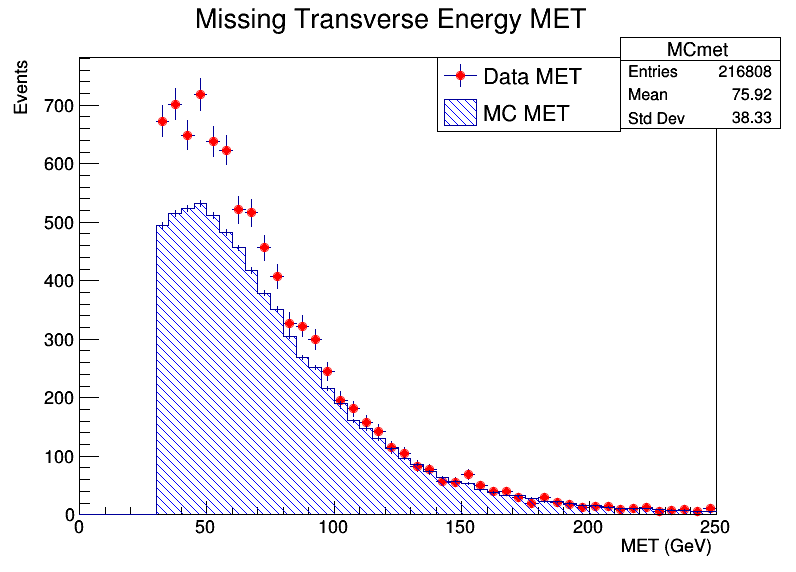

In [101]:
hist_met.SetMarkerStyle(20);
hist_met.SetMarkerColor(2);
hist_met.Draw('E');
hist_MCmet.SetFillColor(4);
hist_MCmet.SetFillStyle(3005);
hist_MCmet.Draw('sameH');
legendmet=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendmet.AddEntry(hist_met,"Data MET","lep");
legendmet.AddEntry(hist_MCmet,"MC MET","f");
legendmet.Draw();
canvas.SetLogy(0);
canvas.Draw();
canvas.Print("met_MC_vs_Data.pdf");

Comparison for the $m_{T}(W)$:

Info in <TCanvas::Print>: pdf file mTW_MC_vs_Data.pdf has been created


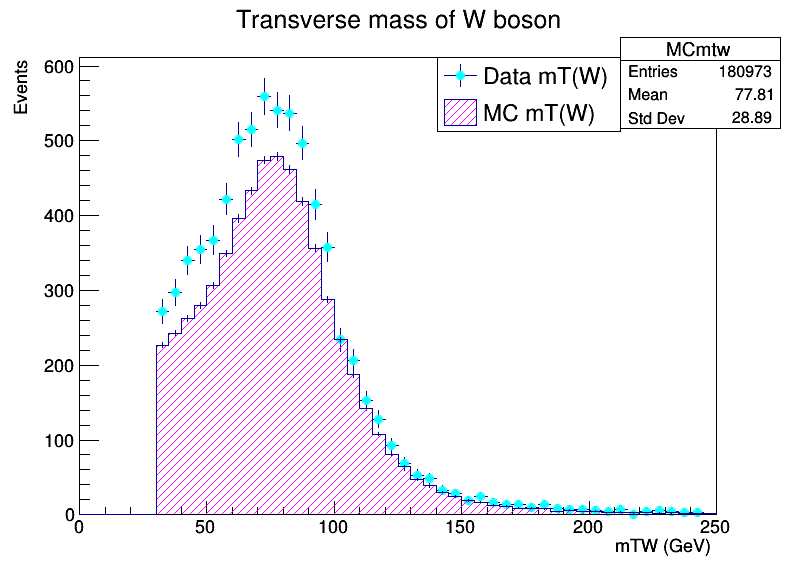

In [104]:
hist_mtw.SetMarkerStyle(20);
hist_mtw.SetMarkerColor(7);
hist_mtw.Draw('E');
hist_MCmtw.SetFillColor(6);
hist_MCmtw.SetFillStyle(3004);
hist_MCmtw.Draw('sameH');
legendmtw=ROOT.TLegend(0.55,0.77,0.78,0.9);
legendmtw.AddEntry(hist_mtw,"Data mT(W)","lep");
legendmtw.AddEntry(hist_MCmtw,"MC mT(W)","f");
legendmtw.Draw();
canvas.Draw();
canvas.Print("mTW_MC_vs_Data.pdf");